In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv("Test_data/test_scaled_data.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,2.652318,1.778113,2.606227,2.963243,-0.066095,1.286504,1.391341,2.026141,0.425758,0.068520,...,1.443859,3.021145,3.719984,0.687803,1.112159,1.581526,2.288284,0.373438,0.203037,0.0
1,-0.696205,-0.211741,-0.680078,-0.678307,1.316561,-0.012481,-0.210090,-0.341537,0.018776,0.375572,...,0.588600,-0.633210,-0.617789,1.601536,0.120573,0.100134,0.136897,-0.120915,0.451600,1.0
2,-0.334438,-0.817449,-0.306262,-0.376847,-1.289575,-0.127730,0.315560,-0.366853,-1.371749,-0.475733,...,-0.970413,-0.432734,-0.485451,-1.468074,-0.111428,0.336895,-0.177597,-1.464156,-0.714279,1.0
3,0.938985,0.663426,0.965802,0.871849,-0.435093,0.487579,0.128362,0.730247,1.175662,-1.161144,...,0.259530,0.955732,0.767011,-0.843912,0.260585,-0.188906,0.621937,0.313516,-0.503000,0.0
4,-0.288131,-0.151861,-0.263888,-0.390168,0.882446,0.548133,0.116251,0.222868,0.900572,0.347923,...,-0.129817,-0.369043,-0.493330,0.078649,0.119220,-0.050670,0.199483,0.390083,-0.010017,1.0


In [3]:
X = df.iloc[: , 0:-1]
y = df.iloc[: , -1]

In [4]:
logistic_regression_model = pickle.load(open("SaveModels/logisticRegressionModel", "rb"))

In [5]:
naive_bayes_model = pickle.load(open("SaveModels/naiveBayesModel", "rb"))

In [6]:
svc_model = pickle.load(open("SaveModels/svcModel", "rb"))

In [7]:
decision_tree_model = pickle.load(open("SaveModels/decisionTreeClassifierModel", "rb"))

In [8]:
random_forest_model = pickle.load(open("SaveModels/randomForestClassifierModel", "rb"))

In [37]:
models = [logistic_regression_model, naive_bayes_model, svc_model, decision_tree_model, random_forest_model]
models_name = ['Logistic Regression', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest']
accuracy = []

In [38]:
for model in models:

    score = model.score(X,y)
    accuracy.append(score)

In [39]:
accuracy_df = pd.DataFrame(np.c_[models_name,acc] , columns=['models','accuracy'])
accuracy_df

,models,accuracy
0,Logistic Regression,0.9736842105263158
1,Naive Bayes,0.956140350877193
2,SVC,0.9736842105263158
3,Decision Tree,0.9298245614035088
4,Random Forest,0.9385964912280702


<AxesSubplot:>

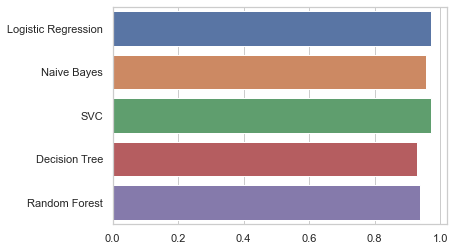

In [40]:
sns.set(style="whitegrid")
sns.barplot(y = models_name,x = accuracy, data= accuracy_df)